# Machine Learning Engineer Nanodegree
## Capstone Project
Firdos Rehman
June 10th, 2018

## Leaf Classification using Machine Learning


### Domain Background

This project is to classify the different leaves. Out of approximately half a million species of the plants in the world, it is very problematic to classify the different species and it had been seen historically that many of them results in duplicate identifications. We can apply automating the plant recognition so that the it helps in many applications like in preserving and species population tracking, Plant - based medicinal research which many people are choosing as it is safer and lesser side effects, ecological reasons, crop and food supply management

The objective is to use binary leaf images and extracted features, including shape, margin & texture, to accurately identify 99 species of plants. Leaves, due to their volume, prevalence, and unique characteristics, are an effective means of differentiating plant species. They also provide a fun introduction to applying techniques that involve image-based features.
As a first step, try building a classifier that uses the provided pre-extracted features. Next, try creating a set of your own features. Finally, examine the errors you're making and see what you can do to improve.

 
Kaggle hosted this competition for the data science community to use for fun and education. This dataset originates from leaf images collected by  
James Cope, Thibaut Beghin, Paolo Remagnino, & Sarah Barman of the Royal Botanic Gardens, Kew, UK.
Charles Mallah, James Cope, James Orwell. Plant Leaf Classification Using Probabilistic Integration of Shape, Texture and Margin Features. Signal Processing, Pattern Recognition and Applications, in press. 2013.

Originally the dataset was hosted by UCI machine learning repository.


### Problem Statement
This project is to build a model which provides highest accuracy to find the species of plants from characteristics of the leaves.

The objective is to use binary leaf images and extracted features, including shape, margin & texture, to accurately identify 99 species of plants. Leaves, due to their volume, prevalence, and unique characteristics, are an effective means of differentiating plant species. They also provide a fun introduction to applying techniques that involve image-based features.
As a first step, try building a classifier that uses the provided pre-extracted features. Next, try creating a set of your own features. Finally, examine the errors you're making and see what you can do to improve.




### Datasets and Inputs

The dataset consists approximately 1,584 images of leaf specimens (16 samples each of 99 species) which have been converted to binary black leaves against white backgrounds. Three sets of features are also provided per image: a shape contiguous descriptor, an interior texture histogram, and a ﬁne-scale margin histogram. For each feature, a 64-attribute vector is given per leaf sample.

Note that of the original 100 species, we have eliminated one on account of incomplete associated data in the original dataset.

#### File descriptions

* train.csv - the training set
* test.csv - the test set
* sample_submission.csv - a sample submission file in the correct format
* images - the image files (each image is named with its corresponding id)

#### Data fields

* id - an anonymous id unique to an image
* margin_1, margin_2, margin_3, ..., margin_64 - each of the 64 attribute vectors for the margin feature
* shape_1, shape_2, shape_3, ..., shape_64 - each of the 64 attribute vectors for the shape feature
* texture_1, texture_2, texture_3, ..., texture_64 - each of the 64 attribute vectors for the texture feature


### Environment Setup

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, log_loss
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings ('ignore')
%matplotlib inline


## Analysis

In [9]:
# Load csv file
train = pd.read_csv('C:/Users/Firdos Rehman/Desktop/2Udacity/Capstone/LeafClassification/train.csv/train.csv')
# Read the .csv files as pandas dataframe

test = pd.read_csv('C:/Users/Firdos Rehman/Desktop/2Udacity/Capstone/LeafClassification/test.csv/test.csv')



### Data Exploration

In [10]:
# Data Description, summary of the data
display(train.describe())

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [11]:
# Information of the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


In [12]:
# Cloumns in the dataset
train.columns

Index(['id', 'species', 'margin1', 'margin2', 'margin3', 'margin4', 'margin5',
       'margin6', 'margin7', 'margin8',
       ...
       'texture55', 'texture56', 'texture57', 'texture58', 'texture59',
       'texture60', 'texture61', 'texture62', 'texture63', 'texture64'],
      dtype='object', length=194)

In [13]:
# Data Types for Each Attribute
types = train.dtypes
types

id             int64
species       object
margin1      float64
margin2      float64
margin3      float64
margin4      float64
margin5      float64
margin6      float64
margin7      float64
margin8      float64
margin9      float64
margin10     float64
margin11     float64
margin12     float64
margin13     float64
margin14     float64
margin15     float64
margin16     float64
margin17     float64
margin18     float64
margin19     float64
margin20     float64
margin21     float64
margin22     float64
margin23     float64
margin24     float64
margin25     float64
margin26     float64
margin27     float64
margin28     float64
              ...   
texture35    float64
texture36    float64
texture37    float64
texture38    float64
texture39    float64
texture40    float64
texture41    float64
texture42    float64
texture43    float64
texture44    float64
texture45    float64
texture46    float64
texture47    float64
texture48    float64
texture49    float64
texture50    float64
texture51    

In [14]:
# First 5 rows of the dataset
train.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [15]:
# Default Correlation (Pearson)
train.corr()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
id,1.000000,-0.011673,-0.027565,-0.059533,0.001639,-0.002419,-0.051818,0.061214,-0.039509,-0.070954,...,-0.040292,-0.005132,-0.043101,0.063337,-0.007915,-0.000823,0.026319,0.032873,0.024299,0.035396
margin1,-0.011673,1.000000,0.806390,-0.182829,-0.297807,-0.475874,0.767718,0.066273,-0.094137,-0.181496,...,0.137158,-0.047771,0.126227,-0.024139,-0.168201,0.035072,-0.007581,-0.033159,-0.075171,0.030414
margin2,-0.027565,0.806390,1.000000,-0.204640,-0.315953,-0.444312,0.825762,-0.083273,-0.086428,-0.120276,...,0.154407,-0.021096,0.123834,-0.063654,-0.157842,0.081069,-0.007057,-0.037405,-0.098957,-0.029532
margin3,-0.059533,-0.182829,-0.204640,1.000000,0.120042,-0.185007,-0.163976,0.095449,0.024350,-0.000042,...,0.047347,-0.027618,0.007261,-0.021390,0.033505,-0.019850,0.084957,-0.081999,-0.148193,0.061780
margin4,0.001639,-0.297807,-0.315953,0.120042,1.000000,0.029480,-0.261437,-0.268271,-0.047693,0.227543,...,-0.071974,-0.009537,-0.050529,-0.044318,0.088857,-0.052317,0.320644,-0.073886,0.050970,0.014343
margin5,-0.002419,-0.475874,-0.444312,-0.185007,0.029480,1.000000,-0.438587,-0.108178,0.056557,0.196745,...,-0.165622,0.059135,0.012938,0.155327,0.149420,0.006542,-0.109229,0.151675,0.022299,-0.148834
margin6,-0.051818,0.767718,0.825762,-0.163976,-0.261437,-0.438587,1.000000,-0.093780,-0.112896,-0.136961,...,0.214571,-0.057067,0.138776,-0.035407,-0.207390,0.066262,-0.050498,-0.031555,-0.132087,-0.003164
margin7,0.061214,0.066273,-0.083273,0.095449,-0.268271,-0.108178,-0.093780,1.000000,0.099867,-0.350804,...,-0.056694,-0.134651,0.010123,0.064425,0.056026,-0.034094,-0.163375,0.015391,-0.001364,0.068512
margin8,-0.039509,-0.094137,-0.086428,0.024350,-0.047693,0.056557,-0.112896,0.099867,1.000000,-0.071887,...,-0.030825,-0.034472,-0.018269,-0.054561,-0.035706,0.048647,-0.079283,-0.048843,0.027758,-0.003191
margin9,-0.070954,-0.181496,-0.120276,-0.000042,0.227543,0.196745,-0.136961,-0.350804,-0.071887,1.000000,...,0.061357,0.139813,0.084557,-0.090558,0.019258,-0.028292,0.088517,-0.031954,-0.119494,-0.097760


In [16]:
# Pearson Correlation 
train.corr(method='pearson')

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
id,1.000000,-0.011673,-0.027565,-0.059533,0.001639,-0.002419,-0.051818,0.061214,-0.039509,-0.070954,...,-0.040292,-0.005132,-0.043101,0.063337,-0.007915,-0.000823,0.026319,0.032873,0.024299,0.035396
margin1,-0.011673,1.000000,0.806390,-0.182829,-0.297807,-0.475874,0.767718,0.066273,-0.094137,-0.181496,...,0.137158,-0.047771,0.126227,-0.024139,-0.168201,0.035072,-0.007581,-0.033159,-0.075171,0.030414
margin2,-0.027565,0.806390,1.000000,-0.204640,-0.315953,-0.444312,0.825762,-0.083273,-0.086428,-0.120276,...,0.154407,-0.021096,0.123834,-0.063654,-0.157842,0.081069,-0.007057,-0.037405,-0.098957,-0.029532
margin3,-0.059533,-0.182829,-0.204640,1.000000,0.120042,-0.185007,-0.163976,0.095449,0.024350,-0.000042,...,0.047347,-0.027618,0.007261,-0.021390,0.033505,-0.019850,0.084957,-0.081999,-0.148193,0.061780
margin4,0.001639,-0.297807,-0.315953,0.120042,1.000000,0.029480,-0.261437,-0.268271,-0.047693,0.227543,...,-0.071974,-0.009537,-0.050529,-0.044318,0.088857,-0.052317,0.320644,-0.073886,0.050970,0.014343
margin5,-0.002419,-0.475874,-0.444312,-0.185007,0.029480,1.000000,-0.438587,-0.108178,0.056557,0.196745,...,-0.165622,0.059135,0.012938,0.155327,0.149420,0.006542,-0.109229,0.151675,0.022299,-0.148834
margin6,-0.051818,0.767718,0.825762,-0.163976,-0.261437,-0.438587,1.000000,-0.093780,-0.112896,-0.136961,...,0.214571,-0.057067,0.138776,-0.035407,-0.207390,0.066262,-0.050498,-0.031555,-0.132087,-0.003164
margin7,0.061214,0.066273,-0.083273,0.095449,-0.268271,-0.108178,-0.093780,1.000000,0.099867,-0.350804,...,-0.056694,-0.134651,0.010123,0.064425,0.056026,-0.034094,-0.163375,0.015391,-0.001364,0.068512
margin8,-0.039509,-0.094137,-0.086428,0.024350,-0.047693,0.056557,-0.112896,0.099867,1.000000,-0.071887,...,-0.030825,-0.034472,-0.018269,-0.054561,-0.035706,0.048647,-0.079283,-0.048843,0.027758,-0.003191
margin9,-0.070954,-0.181496,-0.120276,-0.000042,0.227543,0.196745,-0.136961,-0.350804,-0.071887,1.000000,...,0.061357,0.139813,0.084557,-0.090558,0.019258,-0.028292,0.088517,-0.031954,-0.119494,-0.097760


In [17]:
# Spearman  Correlation 
train.corr(method='spearman')

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
id,1.000000,-0.005938,-0.032744,-0.032375,0.026243,0.000322,-0.032925,0.066159,-0.023498,-0.075309,...,-0.066682,-0.016062,-0.051489,0.058651,-0.006783,0.045329,0.012475,0.036261,0.046607,0.009802
margin1,-0.005938,1.000000,0.863900,-0.029503,-0.316040,-0.693278,0.853267,0.271939,-0.079159,-0.210918,...,0.073576,-0.168627,0.122107,-0.108437,-0.224139,-0.008657,-0.044407,-0.190319,-0.051206,0.028789
margin2,-0.032744,0.863900,1.000000,-0.048113,-0.380975,-0.731762,0.860928,0.174305,-0.070294,-0.154518,...,0.114667,-0.123398,0.106222,-0.124703,-0.222750,-0.033663,-0.027463,-0.168536,-0.082923,-0.002859
margin3,-0.032375,-0.029503,-0.048113,1.000000,0.136801,-0.020226,-0.004225,0.148697,0.035318,-0.103269,...,-0.009736,-0.027850,0.090588,0.023653,0.061174,-0.006170,0.129407,-0.093244,-0.099973,0.093733
margin4,0.026243,-0.316040,-0.380975,0.136801,1.000000,0.165761,-0.371218,-0.207371,-0.053750,0.142605,...,-0.081953,0.063213,-0.043119,0.016966,0.086215,0.018456,0.193536,0.013349,0.105761,0.015133
margin5,0.000322,-0.693278,-0.731762,-0.020226,0.165761,1.000000,-0.687861,0.016383,0.096237,0.124504,...,-0.207446,0.082649,-0.146833,0.170367,0.211682,0.091344,-0.146920,0.208641,0.051077,-0.098373
margin6,-0.032925,0.853267,0.860928,-0.004225,-0.371218,-0.687861,1.000000,0.172893,-0.093783,-0.187946,...,0.096871,-0.140968,0.110675,-0.099226,-0.258443,0.009681,-0.062303,-0.163849,-0.137042,-0.003184
margin7,0.066159,0.271939,0.174305,0.148697,-0.207371,0.016383,0.172893,1.000000,0.131282,-0.403551,...,-0.130327,-0.194059,-0.009402,0.018334,0.066111,-0.016541,-0.220908,-0.042935,0.037980,0.030497
margin8,-0.023498,-0.079159,-0.070294,0.035318,-0.053750,0.096237,-0.093783,0.131282,1.000000,-0.212370,...,-0.034469,-0.060721,0.018397,-0.049655,-0.014853,-0.000597,-0.113495,-0.056725,0.016943,0.027192
margin9,-0.075309,-0.210918,-0.154518,-0.103269,0.142605,0.124504,-0.187946,-0.403551,-0.212370,1.000000,...,0.043352,0.181008,-0.048704,-0.029205,0.075752,-0.050522,0.117026,0.097853,-0.051572,-0.076172


### Exploratory Visualization

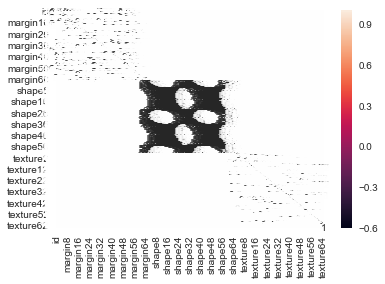

In [21]:
# Correlation Matrix Plot using Seaborn
sns.heatmap(train.corr(), annot=True)
fig.suptitle('Correlation Matrix', fontsize=14)
plt.show()

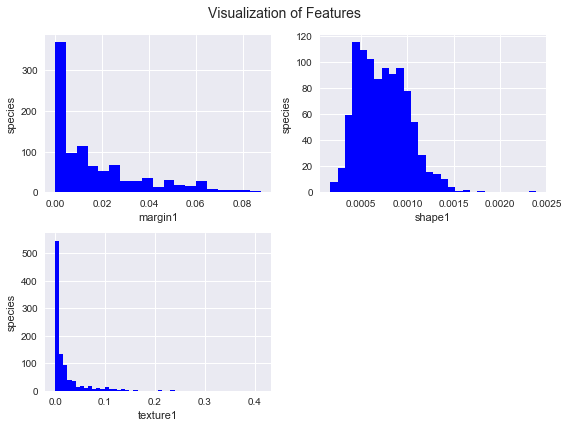

In [22]:
# visualize numerical features
fig = plt.figure(figsize=(8, 8))

ax1 = fig.add_subplot(321)
sns.distplot(train['margin1'], hist_kws={'color': 'blue', 'alpha': 1}, kde=False, ax=ax1)
ax1.set_xlabel('margin1')
ax1.set_ylabel('species')

ax2 = fig.add_subplot(322)
sns.distplot(train['shape1'], hist_kws={'color': 'blue', 'alpha': 1}, kde=False, ax=ax2)
ax2.set_xlabel('shape1')
ax2.set_ylabel('species')

ax3 = fig.add_subplot(323)
sns.distplot(train['texture1'], hist_kws={'color': 'blue', 'alpha': 1}, kde=False, ax=ax3)
ax3.set_xlabel('texture1')
ax3.set_ylabel('species')


fig.suptitle('Visualization of Features', fontsize=14, y=1.03)
plt.tight_layout()



### Data Preparation

In [23]:
# Swiss army knife function to organize the data

def encode(train, test):
    le = LabelEncoder().fit(train.species) 
    labels = le.transform(train.species)           # encode species strings
    classes = list(le.classes_)                    # save column names for submission
    test_ids = test.id                             # save test ids for submission
    
    train = train.drop(['species', 'id'], axis=1)  
    test = test.drop(['id'], axis=1)
    
    return train, labels, test, test_ids, classes

train, labels, test, test_ids, classes = encode(train, test)
train.head(1)

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,...,0.007812,0.0,0.00293,0.00293,0.035156,0.0,0.0,0.004883,0.0,0.025391


In [30]:
# Equal Probability - Benchmark Model
np.random.seed = 3
tp = np.random.randint(0, 99, size=y_test.shape[0])
print(min(tp), max(tp))
#train_predictions = (X_test.shape)
print(y_test.shape, tp.shape)
acc = accuracy_score(y_test, tp)
print("Accuracy: {:.4%}".format(acc))

1 98
(198,) (198,)
Accuracy: 1.0101%


**Baseline Benchmark**
Description of equal probability model:Equal Probability Model which shows that there is an equal probability of being from each plant or any species. This will be the baseline benchmark model.


### Stratified Train-Test split

In [24]:
# construct the iterator
ss_split = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
ss_split.get_n_splits(train, labels)

for train_index, test_index in ss_split.split(train, labels):   
    X_train, X_test = train.values[train_index], train.values[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

### Benchmark Classifier

In [25]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


classifiers = [
    LogisticRegression(solver='newton-cg', multi_class='multinomial'),
    RandomForestClassifier()]
 
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

LogisticRegression
****Results****
Accuracy: 65.6566%
Log Loss: 4.167567814778244
RandomForestClassifier
****Results****
Accuracy: 85.3535%
Log Loss: 1.650670134837682


### Benchmark Visualization

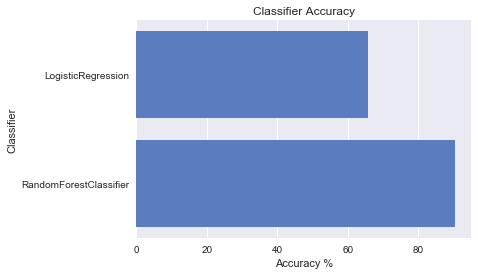

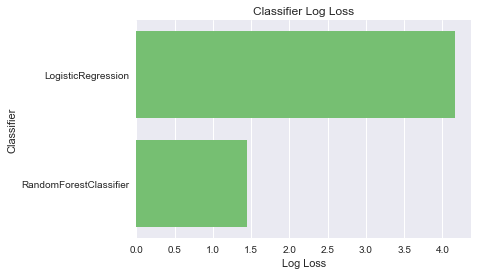

In [116]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()


### Implementation

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# define the model
model = Sequential()
model.add(Dense(192, input_shape=X_train.shape[1:], activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(99, activation='softmax'))

# summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 192)               37056     
_________________________________________________________________
dropout_1 (Dropout)          (None, 192)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 99)                19107     
Total params: 56,163
Trainable params: 56,163
Non-trainable params: 0
_________________________________________________________________


### Data Preparation - One-hot encoding

In [27]:
from keras.utils import np_utils

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train_nn = np_utils.to_categorical(y_train, 99)
y_test_nn = np_utils.to_categorical(y_test, 99)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train_nn[:10])

Integer-valued labels:
[15 54 48 67 63 27 11 12 52 72]
One-hot labels:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 

In [92]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])
  

# train the model
hist = model.fit(X_train, y_train_nn, batch_size=128, epochs=200,
          validation_split=0.2, callbacks=[],
          verbose=1, shuffle=True)

# evaluate test accuracy
score = model.evaluate(X_test, y_test_nn, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)


Train on 633 samples, validate on 159 samples
Epoch 1/200
633/633 [==============================] - 1s 2ms/step - loss: 0.1965 - acc: 0.9542 - val_loss: 0.2483 - val_acc: 0.9371
Epoch 2/200
633/633 [==============================] - 0s 132us/step - loss: 0.2177 - acc: 0.9384 - val_loss: 0.2488 - val_acc: 0.9371
Epoch 3/200
633/633 [==============================] - 0s 190us/step - loss: 0.2183 - acc: 0.9494 - val_loss: 0.2489 - val_acc: 0.9371
Epoch 4/200
633/633 [==============================] - 0s 218us/step - loss: 0.2284 - acc: 0.9289 - val_loss: 0.2482 - val_acc: 0.9371
Epoch 5/200
633/633 [==============================] - 0s 207us/step - loss: 0.2053 - acc: 0.9400 - val_loss: 0.2467 - val_acc: 0.9371
Epoch 6/200
633/633 [==============================] - 0s 225us/step - loss: 0.2097 - acc: 0.9479 - val_loss: 0.2463 - val_acc: 0.9371
Epoch 7/200
633/633 [==============================] - 0s 165us/step - loss: 0.2029 - acc: 0.9431 - val_loss: 0.2458 - val_acc: 0.9371
Epoch 8/200

Epoch 61/200
633/633 [==============================] - 0s 235us/step - loss: 0.2039 - acc: 0.9494 - val_loss: 0.2432 - val_acc: 0.9497
Epoch 62/200
633/633 [==============================] - 0s 147us/step - loss: 0.2066 - acc: 0.9305 - val_loss: 0.2429 - val_acc: 0.9497
Epoch 63/200
633/633 [==============================] - 0s 139us/step - loss: 0.1850 - acc: 0.9431 - val_loss: 0.2420 - val_acc: 0.9497
Epoch 64/200
633/633 [==============================] - 0s 169us/step - loss: 0.1900 - acc: 0.9558 - val_loss: 0.2407 - val_acc: 0.9497
Epoch 65/200
633/633 [==============================] - 0s 117us/step - loss: 0.2051 - acc: 0.9558 - val_loss: 0.2404 - val_acc: 0.9497
Epoch 66/200
633/633 [==============================] - 0s 104us/step - loss: 0.1814 - acc: 0.9542 - val_loss: 0.2409 - val_acc: 0.9497
Epoch 67/200
633/633 [==============================] - 0s 107us/step - loss: 0.2336 - acc: 0.9242 - val_loss: 0.2414 - val_acc: 0.9497
Epoch 68/200
633/633 [==========================

633/633 [==============================] - 0s 107us/step - loss: 0.1833 - acc: 0.9494 - val_loss: 0.2369 - val_acc: 0.9434
Epoch 122/200
633/633 [==============================] - 0s 107us/step - loss: 0.1823 - acc: 0.9621 - val_loss: 0.2373 - val_acc: 0.9434
Epoch 123/200
633/633 [==============================] - 0s 109us/step - loss: 0.1944 - acc: 0.9415 - val_loss: 0.2383 - val_acc: 0.9434
Epoch 124/200
633/633 [==============================] - 0s 109us/step - loss: 0.1745 - acc: 0.9589 - val_loss: 0.2389 - val_acc: 0.9434
Epoch 125/200
633/633 [==============================] - 0s 101us/step - loss: 0.1843 - acc: 0.9542 - val_loss: 0.2399 - val_acc: 0.9434
Epoch 126/200
633/633 [==============================] - 0s 112us/step - loss: 0.1638 - acc: 0.9684 - val_loss: 0.2400 - val_acc: 0.9434
Epoch 127/200
633/633 [==============================] - 0s 107us/step - loss: 0.1782 - acc: 0.9558 - val_loss: 0.2397 - val_acc: 0.9434
Epoch 128/200
633/633 [==============================] 